# Dataproject

This project contain data from DST and will primary concern sport

In [ ]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Importing the relevant packages  

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

## Read and clean data

We first of all make sure that the data is stored correctly

In [32]:
import os 

assert os.path.isdir('data/')
assert os.path.isfile('data/sport.csv')

os.listdir('data/')

['.DS_Store', 'sport2.csv', 'sport.csv']

We read the file

In [33]:
filename = 'data/sport2.csv'
pd.read_csv(filename, encoding='latin1').head(5)

,";"" "";"" "";"" "";""2014"";""2015"";""2016"";""2017"";""2018"";""2019"";""2020"";""2021"";""2022"""
0,25-59 ï¿½r
1,";""Kï¿½n i alt"""
2,";"" "";""Hele landet"""
3,";"" "";"" "";""Atletik"";12840;8280;3920;3020;2670;..."
4,";"" "";"" "";""Amerikansk fodbold"";820;890;990;100..."


In [64]:
sport = pd.read_csv(filename, sep=';')
sport.head(5)

,,.1,.2,.3,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,25-59 �r,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,K�n i alt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,,,Hele landet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,,,,Atletik,12840,8280,3920,3020,2670,2590,2460,3210.0,2400.0
4,,,,Amerikansk fodbold,820,890,990,1000,920,930,930,970.0,910.0


In [48]:
sport_cleaned = sport.drop([0,1,2])
print(sport_cleaned.head(5))

      .1  .2                  .3   2014   2015   2016   2017   2018   2019  \
3                        Atletik  12840   8280   3920   3020   2670   2590   
4             Amerikansk fodbold    820    890    990   1000    920    930   
5                      Badminton  63880  59350  58620  57060  55460  53710   
6                     Basketball   3170   3120   3530   3440   4010   4160   
7                     Bordtennis   4130   4150   3990   3950   4010   4090   

    2020     2021     2022  
3   2460   3210.0   2400.0  
4    930    970.0    910.0  
5  51840  49190.0  49160.0  
6   4320   4230.0   4590.0  
7   3640   3420.0   3570.0  


In [50]:
print(sport_cleaned.columns)

Index([' ', ' .1', ' .2', ' .3', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2022'],
      dtype='object')


In [51]:
sport_drop = ['.1', '.2']

sport_cleaned.columns = sport_cleaned.columns.str.strip()

sport_cleaned = sport_cleaned.drop(columns=sport_drop)

print(sport_cleaned.head(5))

                      .3   2014   2015   2016   2017   2018   2019   2020  \
3                Atletik  12840   8280   3920   3020   2670   2590   2460   
4     Amerikansk fodbold    820    890    990   1000    920    930    930   
5              Badminton  63880  59350  58620  57060  55460  53710  51840   
6             Basketball   3170   3120   3530   3440   4010   4160   4320   
7             Bordtennis   4130   4150   3990   3950   4010   4090   3640   

      2021     2022  
3   3210.0   2400.0  
4    970.0    910.0  
5  49190.0  49160.0  
6   4230.0   4590.0  
7   3420.0   3570.0  


In [53]:
sport_cleaned.rename(columns = {'.3':'sport'}, inplace=True)
sport_cleaned.head(5)

,,sport,2014,2015,2016,2017,2018,2019,2020,2021,2022
3,,Atletik,12840,8280,3920,3020,2670,2590,2460,3210.0,2400.0
4,,Amerikansk fodbold,820,890,990,1000,920,930,930,970.0,910.0
5,,Badminton,63880,59350,58620,57060,55460,53710,51840,49190.0,49160.0
6,,Basketball,3170,3120,3530,3440,4010,4160,4320,4230.0,4590.0
7,,Bordtennis,4130,4150,3990,3950,4010,4090,3640,3420.0,3570.0


In [55]:
sport_cleaned.reset_index(inplace=True, drop=True)
sport_cleaned.head(5)

,,sport,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,,Atletik,12840,8280,3920,3020,2670,2590,2460,3210.0,2400.0
1,,Amerikansk fodbold,820,890,990,1000,920,930,930,970.0,910.0
2,,Badminton,63880,59350,58620,57060,55460,53710,51840,49190.0,49160.0
3,,Basketball,3170,3120,3530,3440,4010,4160,4320,4230.0,4590.0
4,,Bordtennis,4130,4150,3990,3950,4010,4090,3640,3420.0,3570.0


In [67]:
numerical = ['2014','2015','2016','2017','2018','2019','2020']
sport_cleaned[numerical] = sport_cleaned[numerical].apply(pd.to_numeric, errors='coerce')
print(sport_cleaned.dtypes)

          object
sport     object
2014     float64
2015     float64
2016     float64
2017     float64
2018     float64
2019     float64
2020     float64
2021     float64
2022     float64
dtype: object


In [68]:
sport_cleaned.describe()

,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,18.000000,18.000000,18.000000,19.000000,19.000000,19.000000,19.000000,20.000000,20.000000
mean,32907.777778,32481.666667,32731.111111,30890.526316,31340.526316,32039.473684,30157.894737,28394.500000,29680.500000
std,32538.670126,33011.797757,35950.078277,35601.227737,37180.949942,37917.939096,34989.939122,33168.506539,34754.000069
min,820.000000,890.000000,990.000000,340.000000,790.000000,930.000000,930.000000,970.000000,910.000000
25%,6545.000000,4852.500000,4232.500000,3695.000000,4010.000000,4125.000000,3980.000000,4027.500000,4335.000000
50%,22630.000000,22585.000000,22125.000000,21350.000000,21170.000000,20850.000000,20180.000000,14835.000000,17200.000000
75%,47222.500000,48977.500000,50285.000000,51080.000000,48910.000000,52090.000000,44735.000000,42990.000000,43020.000000
max,99920.000000,103360.000000,130980.000000,129880.000000,137840.000000,140750.000000,128490.000000,116670.000000,125420.000000


In [72]:
col_dict = {}
for i in range(2014,2022+1):
    col_dict[str(i)] = f'sport_{i}'

col_dict = {str(i) : f'sport_{i}' for i in range(2014,2022+1)}
col_dict

{'2014': 'sport_2014',
 '2015': 'sport_2015',
 '2016': 'sport_2016',
 '2017': 'sport_2017',
 '2018': 'sport_2018',
 '2019': 'sport_2019',
 '2020': 'sport_2020',
 '2021': 'sport_2021',
 '2022': 'sport_2022'}

In [73]:
sport_cleaned.rename(columns=col_dict,inplace=True)
sport_cleaned.head(10)

,,sport,sport_2014,sport_2015,sport_2016,sport_2017,sport_2018,sport_2019,sport_2020,sport_2021,sport_2022
0,,Atletik,12840.0,8280.0,3920.0,3020.0,2670.0,2590.0,2460.0,3210.0,2400.0
1,,Amerikansk fodbold,820.0,890.0,990.0,1000.0,920.0,930.0,930.0,970.0,910.0
2,,Badminton,63880.0,59350.0,58620.0,57060.0,55460.0,53710.0,51840.0,49190.0,49160.0
3,,Basketball,3170.0,3120.0,3530.0,3440.0,4010.0,4160.0,4320.0,4230.0,4590.0
4,,Bordtennis,4130.0,4150.0,3990.0,3950.0,4010.0,4090.0,3640.0,3420.0,3570.0
5,,Cykling,36880.0,39400.0,39190.0,38100.0,37120.0,35320.0,34110.0,32840.0,29680.0
6,,Dans,13720.0,12480.0,12700.0,12490.0,11300.0,11290.0,9340.0,9430.0,9840.0
7,,Esport,NaN,NaN,NaN,340.0,790.0,1250.0,1370.0,1680.0,1800.0
8,,Fitness,99920.0,103360.0,130980.0,129880.0,137840.0,140750.0,128490.0,116670.0,125420.0
9,,Fodbold,97240.0,98010.0,95900.0,96030.0,101740.0,101790.0,96860.0,102330.0,101580.0


In [74]:
sport_cleaned.loc[sport_cleaned.sport == 'Fodbold']

,,sport,sport_2014,sport_2015,sport_2016,sport_2017,sport_2018,sport_2019,sport_2020,sport_2021,sport_2022
9,,Fodbold,97240.0,98010.0,95900.0,96030.0,101740.0,101790.0,96860.0,102330.0,101580.0


In [76]:
sport_long = pd.wide_to_long(sport_cleaned, stubnames='sport_', i='sport', j='year')
sport_long.head(10)

,,,sport_
sport,year,,
Atletik,2014,,12840.0
Amerikansk fodbold,2014,,820.0
Badminton,2014,,63880.0
Basketball,2014,,3170.0
Bordtennis,2014,,4130.0
Cykling,2014,,36880.0
Dans,2014,,13720.0
Esport,2014,,NaN
Fitness,2014,,99920.0


In [77]:
sport_long.xs('Fodbold', level='sport')

,,sport_
year,,
2014,,97240.0
2015,,98010.0
2016,,95900.0
2017,,96030.0
2018,,101740.0
2019,,101790.0
2020,,96860.0
2021,,102330.0
2022,,101580.0


In [80]:
sport_long = sport_long.reset_index()
sport_long.loc[sport_long.sport == 'Fodbold', :]

,sport,year,,sport_
9,Fodbold,2014,,97240.0
29,Fodbold,2015,,98010.0
49,Fodbold,2016,,95900.0
69,Fodbold,2017,,96030.0
89,Fodbold,2018,,101740.0
109,Fodbold,2019,,101790.0
129,Fodbold,2020,,96860.0
149,Fodbold,2021,,102330.0
169,Fodbold,2022,,101580.0


<Axes: xlabel='year'>

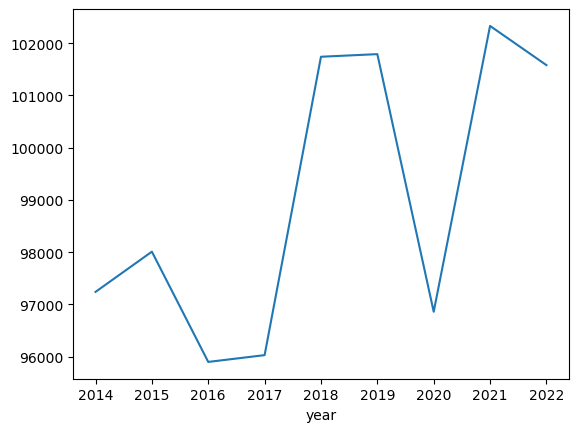

In [82]:
sport_fodbold = sport_long.loc[sport_long['sport'] == 'Fodbold', :]
sport_fodbold.plot(x='year',y='sport_',legend=False)

In [83]:
import ipywidgets as widgets
def plot_e(df, sport):
    I = df['sport'] == sport
    ax=df.loc[I,:].plot(x='year', y='sport_', style='-o', legend=False)

In [84]:
widgets.interact(plot_e,
    df = widgets.fixed(sport_long),
    sport = widgets.Dropdown(description='sport',
                             options=sport_long.sport.unique(),
                             value='Fodbold') 
);